In [1]:
library(tidyverse)
library(here)
library(scales)

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/ychr

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading ychr


In [73]:
colors <- c("red", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

In [55]:
tmrca_df <- readRDS(here("data/rds/tmrca2.rds"))

In [56]:
tafr <- tmrca_df %>%
    filter(dp == 3, afr == "a00", arch == "den8", capture == "full", sites == "all") %>%
    select(name = afr, tmrca = tmrca_afr)

In [57]:
tarch <- tmrca_df %>%
    filter(afr == "a00") %>%
    filter(dp == 3 & sites == "tv_only" & capture == "full" & arch %in% c("den4", "den8", "mez2", "spy1") |
           dp == 3 & sites == "tv_only" & capture == "lippold" & arch == "elsidron2" |
           dp %in% c(1, 3) & sites == "all" & capture == "exome" & arch == "elsidron1") %>%
    mutate(arch = case_when(arch == "elsidron1" & dp == 1 ~ "elsidron_dp1",
                            arch == "elsidron1" & dp == 3 ~ "elsidron_dp3",
                            TRUE ~ arch)) %>%
    select(name = arch, tmrca = tmrca_arch)

In [59]:
tmrca <- bind_rows(tafr, tarch) %>%
    mutate(set = case_when(name == "a00" ~ "A00",
                       name %in% c("den4", "den8") ~ "Denisovan",
                       name %in% c("spy1", "mez2", "elsidron2") ~ "Neanderthal",
                       TRUE ~ "other")) %>%
    mutate(name = case_when(name == "den4" ~ "Denisova 4 (1.6X)",
                            name == "den8" ~ "Denisova 8 (3.6X)",
                            name == "elsidron2" ~ "El Sidron (8X)",
                            name == "mez2" ~ "Mezmaiskaya 2 (15X)",
                            name == "spy1" ~ "Spy 1 (0.9X)",
                            name == "elsidron_dp1" ~ "El Sidron (3X, Mendez et al.)",
                            name == "elsidron_dp3" ~ "El Sidron (3X, Mendez at al., filtered)",
                            name == "a00" ~ "A00 lineage (21X)")) %>%
    mutate(name = fct_relevel(name, "El Sidron (8X)", "El Sidron (3X, Mendez et al.)",
                              "El Sidron (3X, Mendez at al., filtered)", "A00 lineage (21X)", after = Inf))

In [26]:
bind_rows(tafr, tarch) %>%
mutate(set = case_when(name == "a00" ~ "A00",
                       name %in% c("den4", "den8") ~ "Denisovan",
                       name %in% c("spy1", "mez2", "elsidron2") ~ "Neanderthal",
                       TRUE ~ "other")) %>%
group_by(set) %>%
summarise_if(is.numeric, mean)

set,tmrca
A00,265532.1
Denisovan,634782.9
Neanderthal,351265.8
other,430440.4


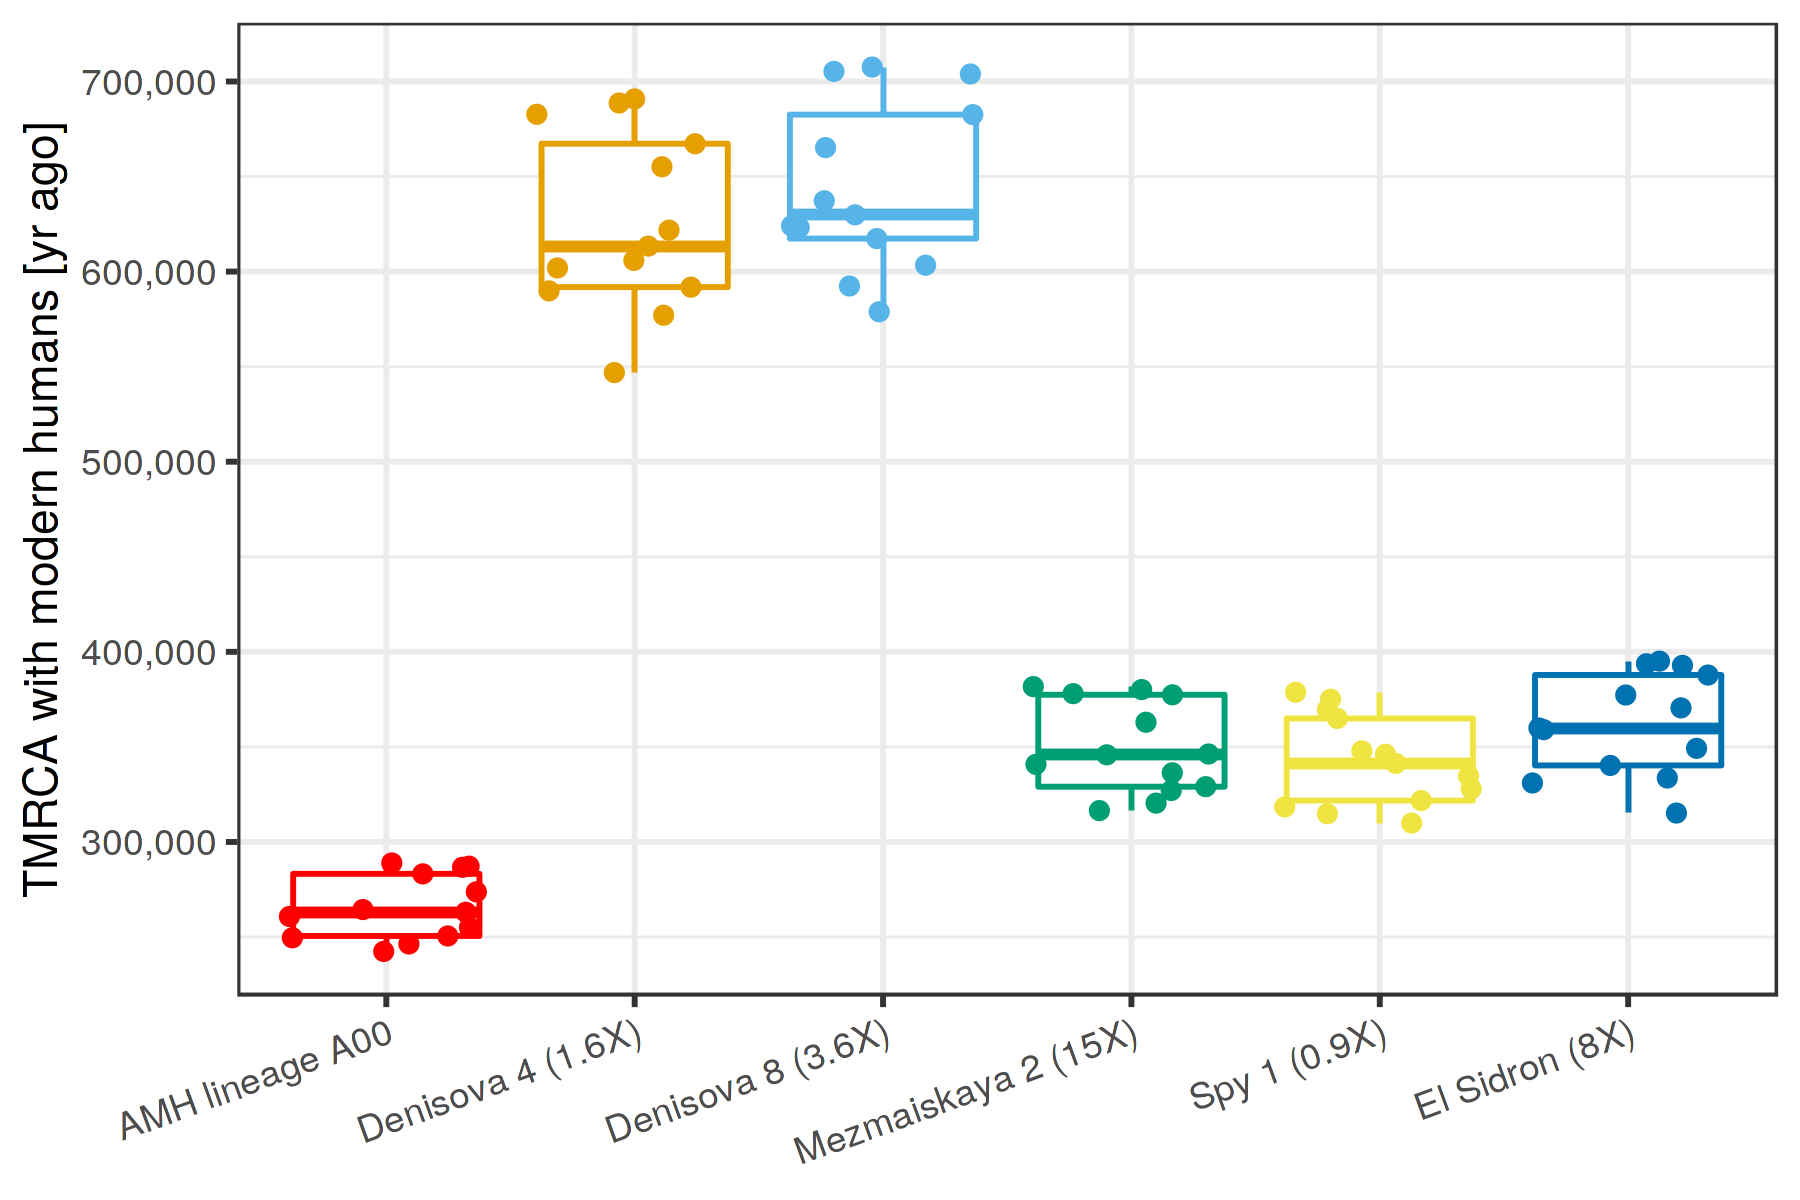

In [77]:
set_dim(6, 4)

tmrca %>%
filter(! name %in% c("El Sidron (3X, Mendez et al.)", "El Sidron (3X, Mendez at al., filtered)")) %>%
ggplot(aes(name, tmrca, color = name)) +
    geom_boxplot() +
    geom_jitter() + 
    theme_bw() +
    xlab("") + ylab("TMRCA with modern humans [yr ago]") +
    guides(color = guide_legend("archaic human")) +
    scale_y_continuous(labels = comma) +
    theme(legend.position = "none",
          axis.text.x = element_text(hjust = 1, angle = 20),
          axis.title.x=element_blank()) +
    scale_color_manual(values = colors)

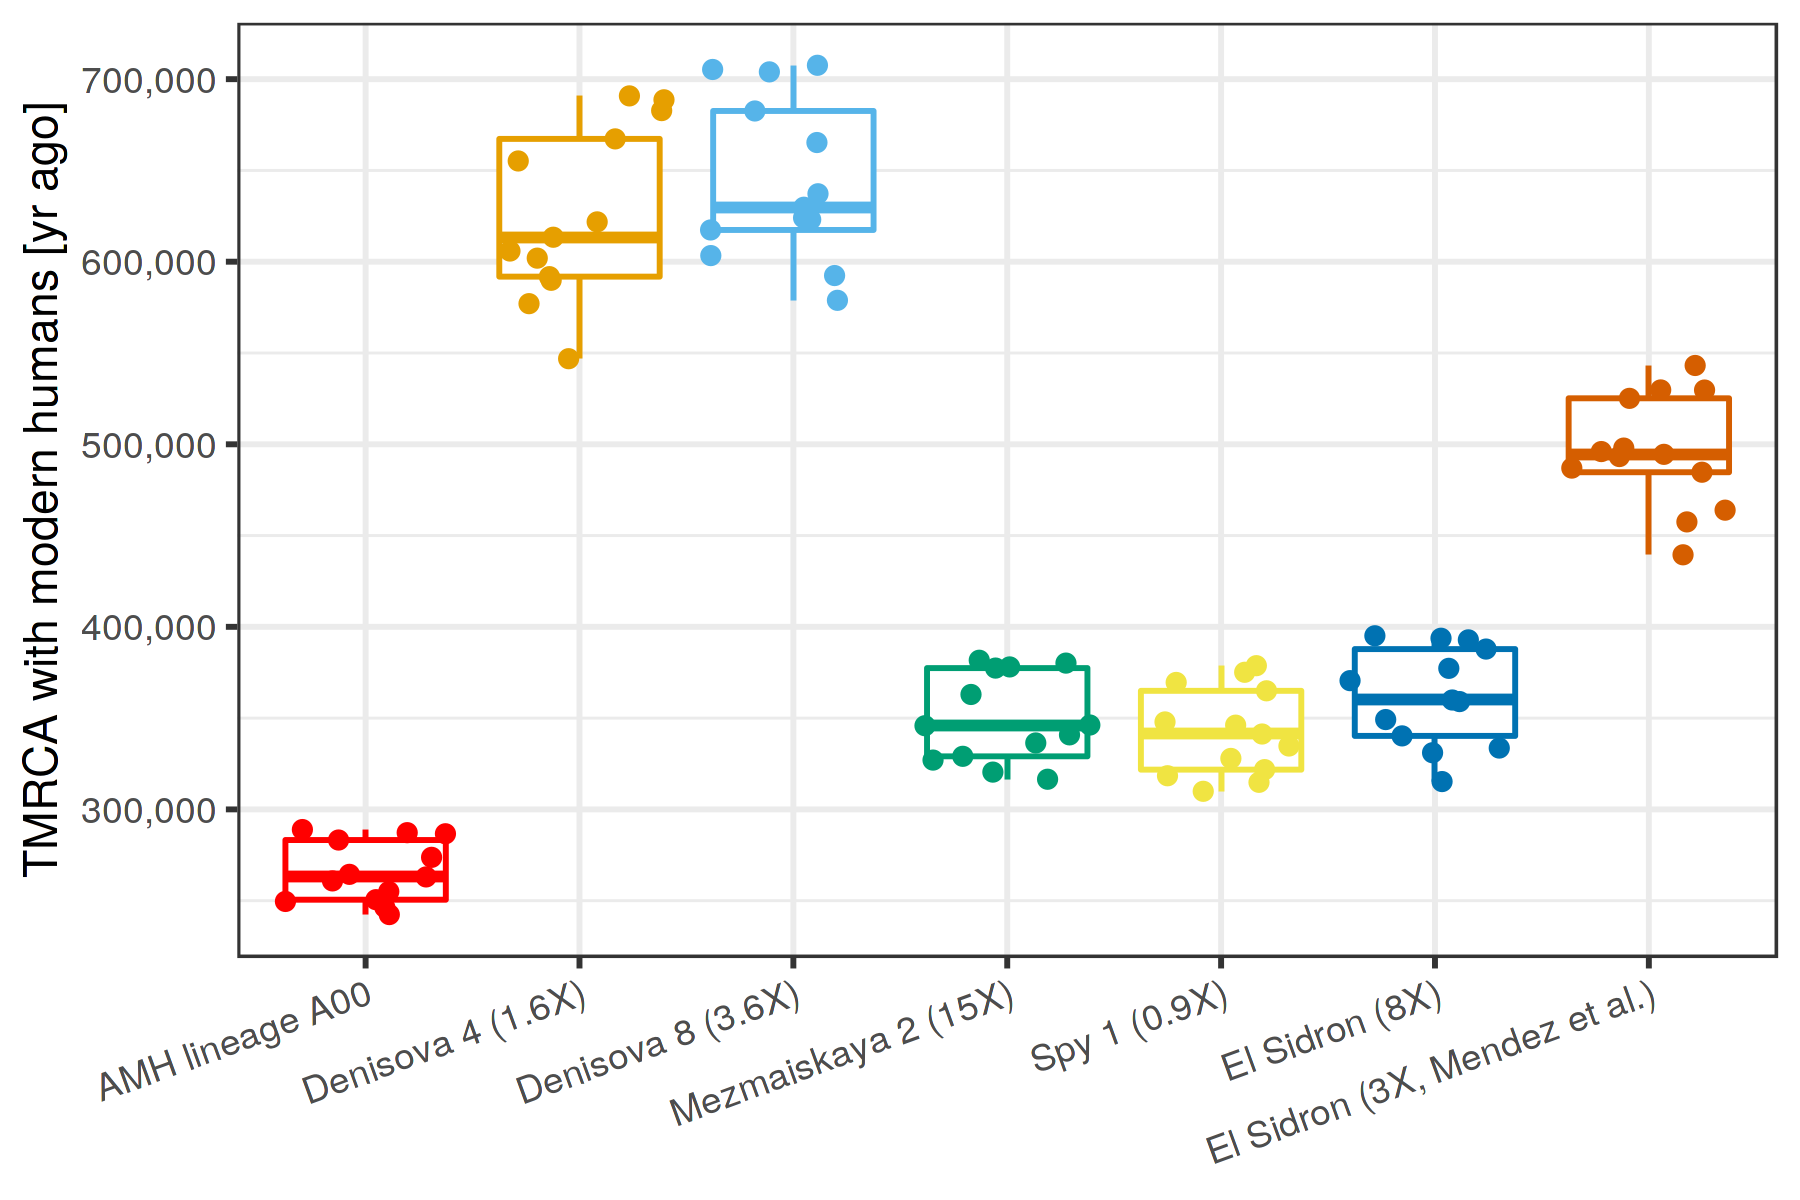

In [79]:
set_dim(6, 4)

tmrca %>%
filter(! name %in% c("El Sidron (3X, Mendez at al., filtered)")) %>%
ggplot(aes(name, tmrca, color = name)) +
    geom_boxplot() +
    geom_jitter() + 
    theme_bw() +
    xlab("") + ylab("TMRCA with modern humans [yr ago]") +
    guides(color = guide_legend("archaic human")) +
    scale_y_continuous(labels = comma) +
    theme(legend.position = "none",
          axis.text.x = element_text(hjust = 1, angle = 20),
          axis.title.x=element_blank()) +
    scale_color_manual(values = colors)

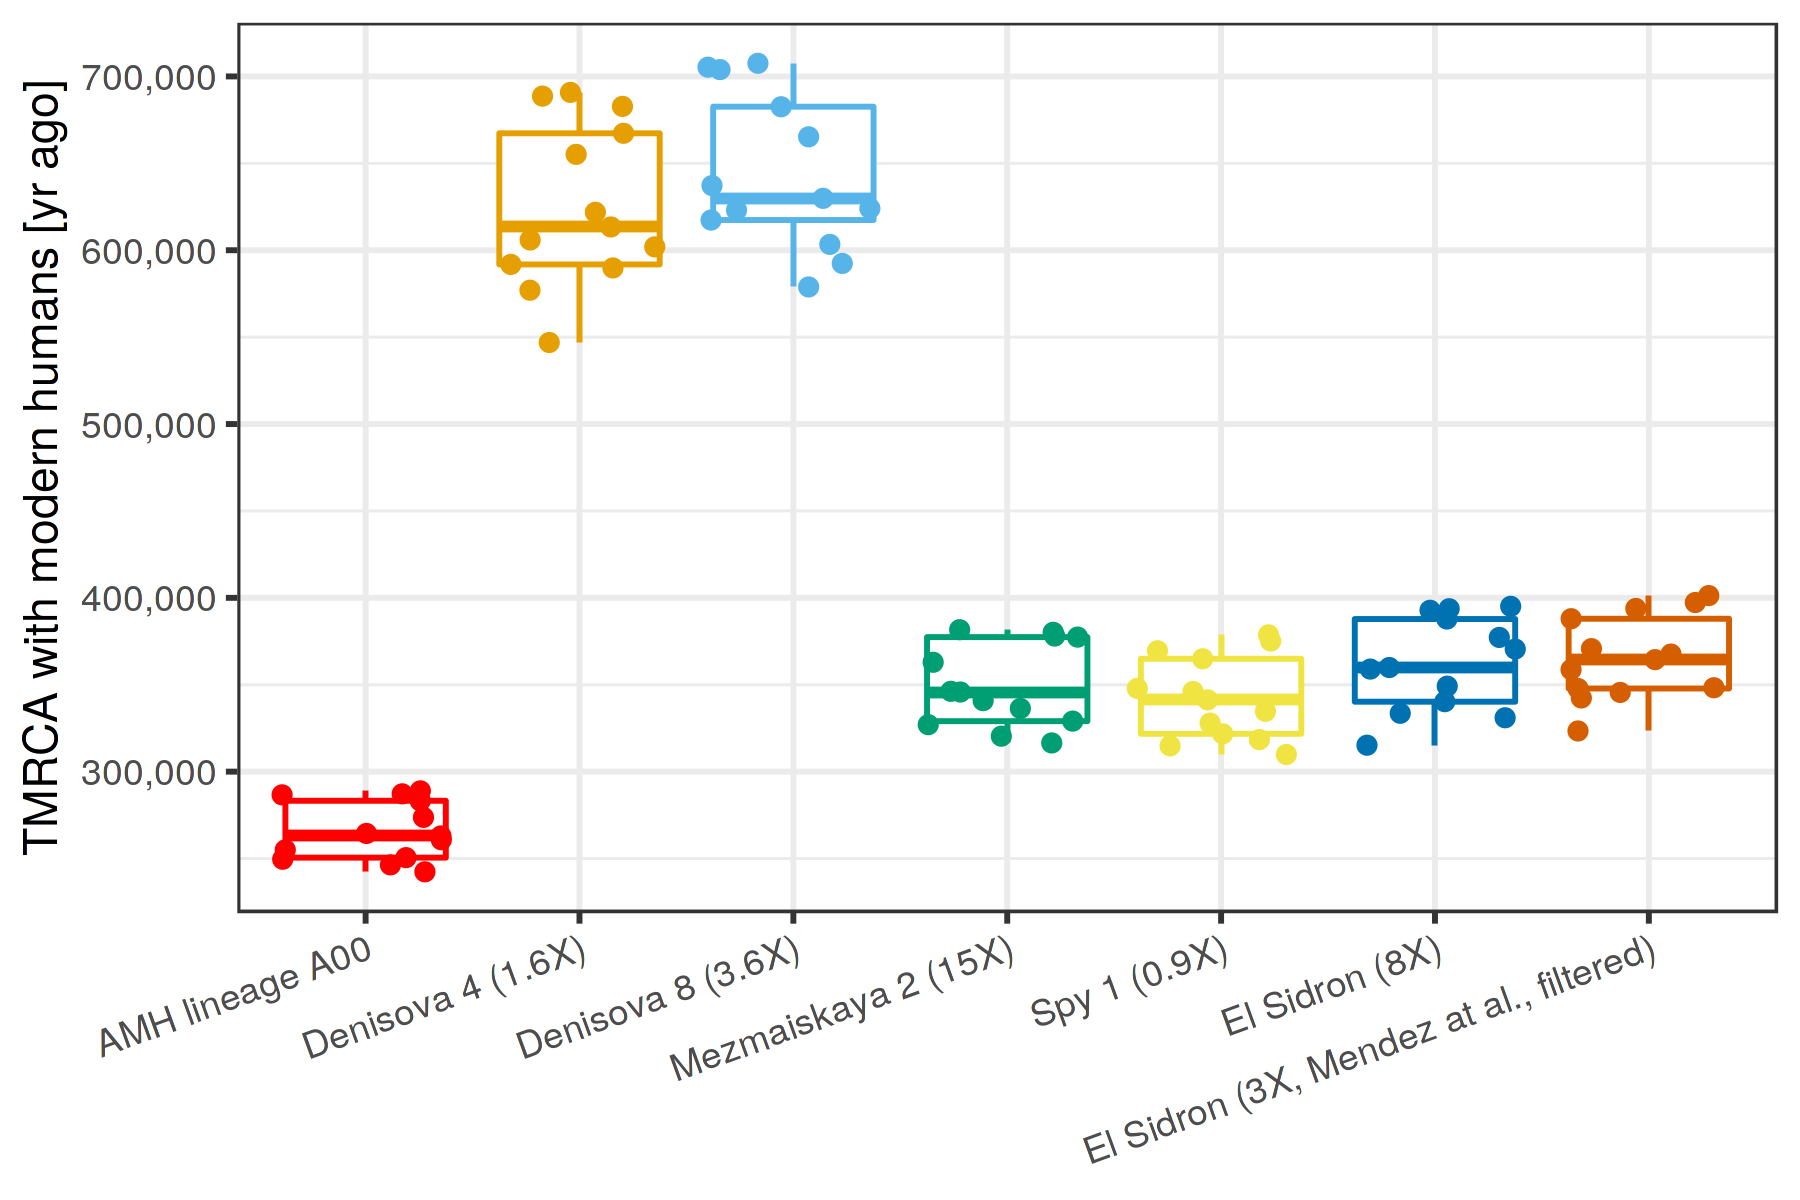

In [81]:
set_dim(6, 4)

tmrca %>%
filter(! name %in% c("El Sidron (3X, Mendez et al.)")) %>%
ggplot(aes(name, tmrca, color = name)) +
    geom_boxplot() +
    geom_jitter() + 
    theme_bw() +
    xlab("") + ylab("TMRCA with modern humans [yr ago]") +
    guides(color = guide_legend("archaic human")) +
    scale_y_continuous(labels = comma) +
    theme(legend.position = "none",
          axis.text.x = element_text(hjust = 1, angle = 20),
          axis.title.x=element_blank()) +
    scale_color_manual(values = colors)

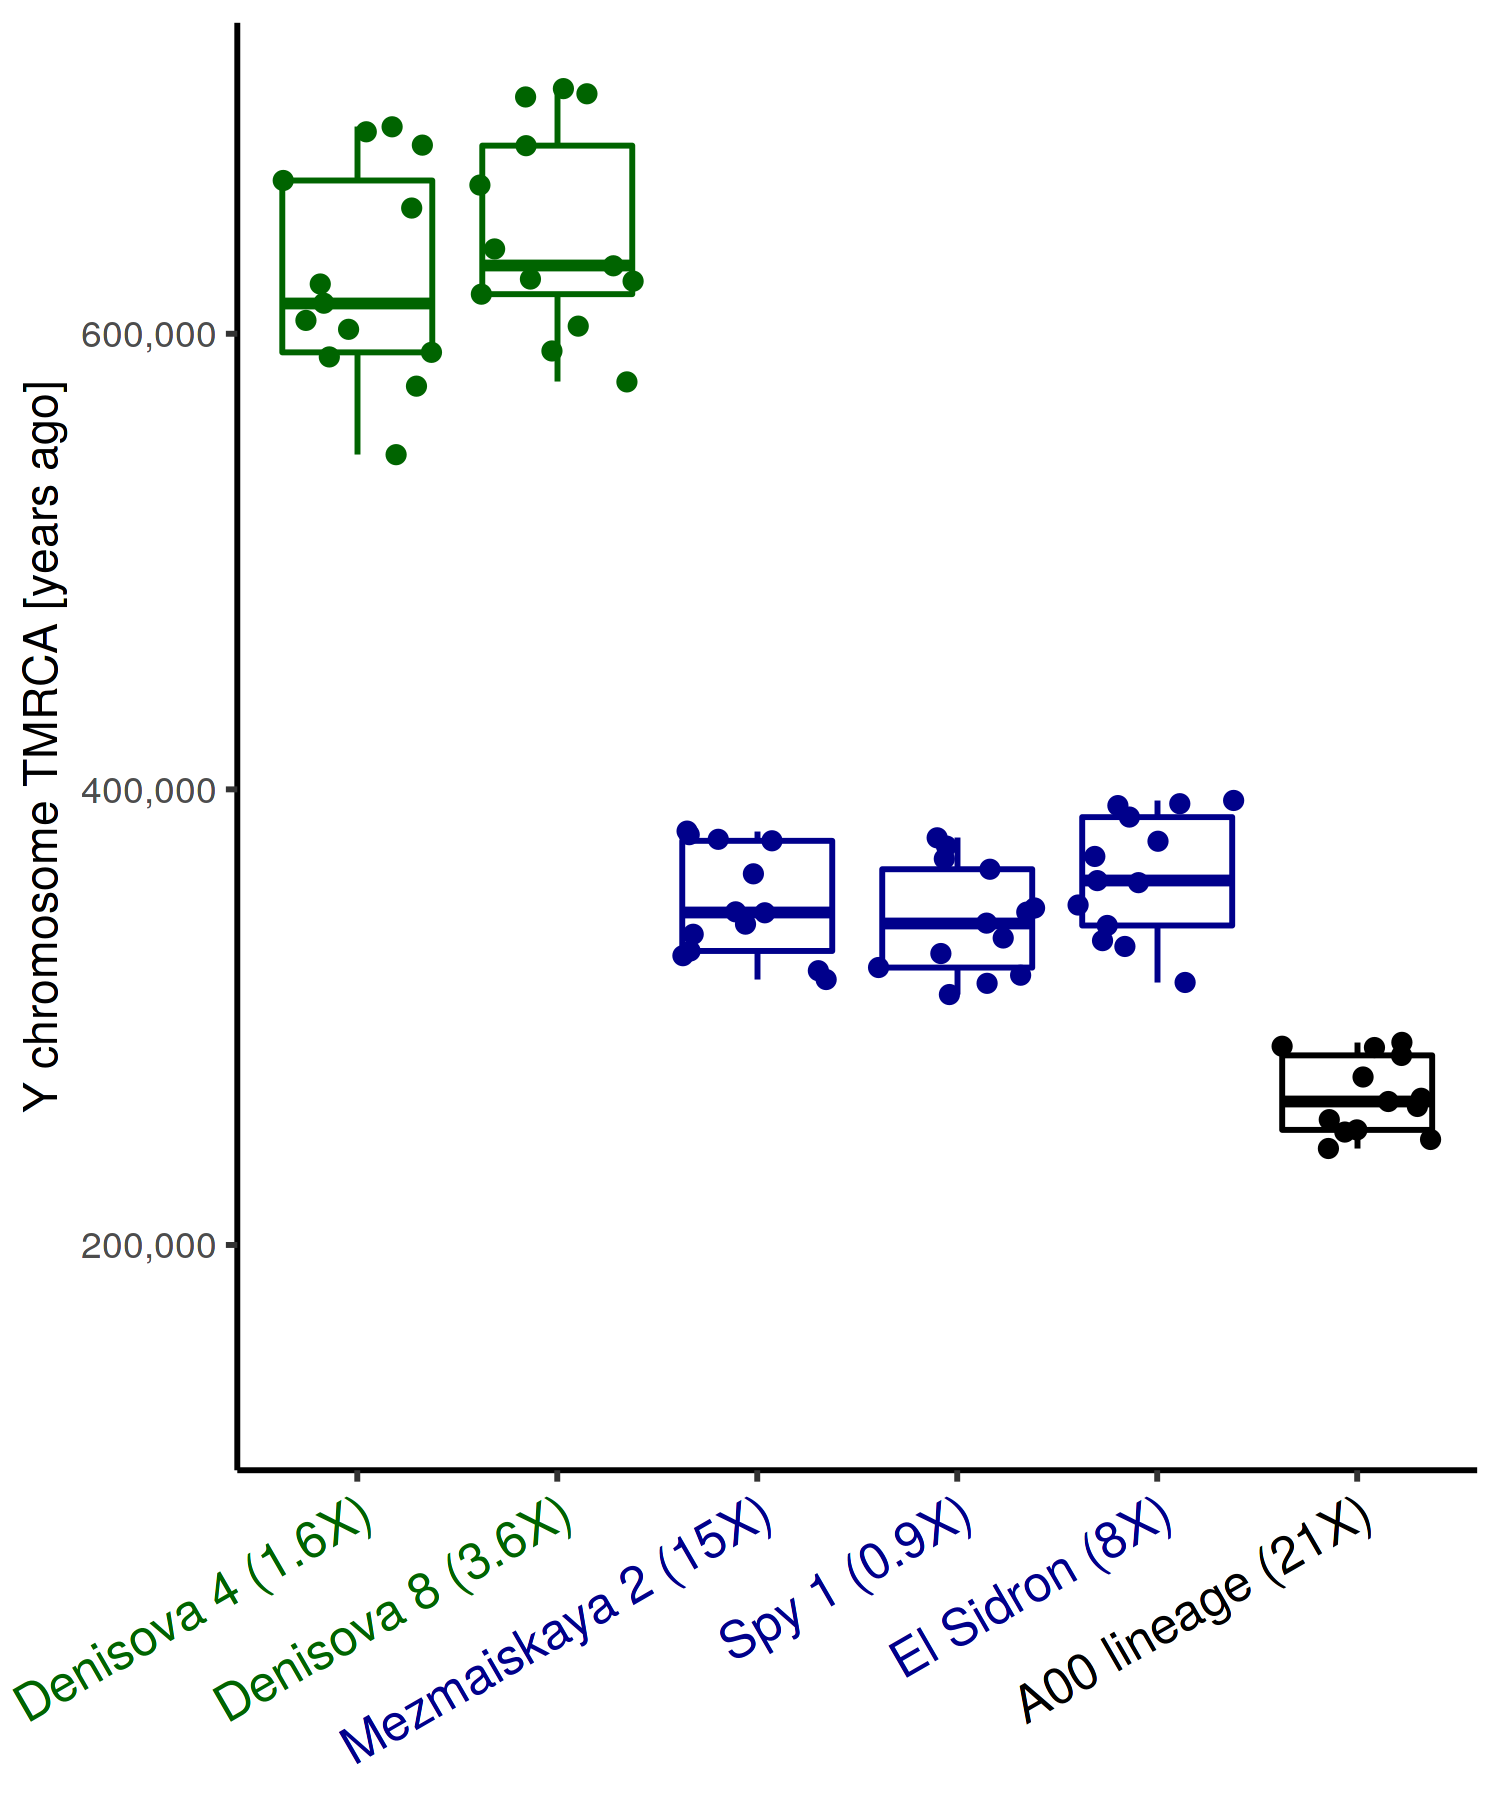

In [60]:
set_dim(5, 6)

tmrca %>%
filter(! name %in% c("El Sidron (3X, Mendez et al.)", "El Sidron (3X, Mendez at al., filtered)")) %>%
ggplot(aes(name, tmrca, color = set)) +
    geom_boxplot() +
    geom_jitter() + 
    theme_classic() +
    xlab("") + ylab("Y chromosome TMRCA [years ago]") +
    expand_limits(y = 130000) +
    guides(color = guide_legend("archaic human")) +
    scale_y_continuous(labels = comma) +
    theme(legend.position = "none",
          axis.text.x = element_text(hjust = 1, angle = 30, size = 12,
                                     color = c(rep("darkgreen", 2), rep("darkblue", 3), "black")),
          axis.title.x = element_blank()) +
    scale_color_manual(values = c("black", "darkgreen", "darkblue"))